In [3]:
%load_ext autoreload
%autoreload 2 
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import os
import pandas as pd
import numpy as np 
import pickle as pk
import glob
from fbprophet import Prophet
import sys
sys.path.append('../')
import wiki
from wiki import utils 
import multiprocessing as mp
total_proc = None
from tqdm import tqdm
from IPython.display import clear_output

# Results Analysis
* majority of bad are due to trend below zero for val period, which makes it predict all zero
* good ones are GOOD!
* outliers should help without hurting too much

In [5]:
PROPHET_PATH = '../data/prophet/'
RESULTS_PATH = 'results/'
VERSION = 'v2/'

In [6]:
df = pd.read_feather(PROPHET_PATH+RESULTS_PATH+VERSION[:-1]+'df.f')
page_index = pd.read_feather(PROPHET_PATH+'page_index.f')

In [7]:
df[VERSION[:-1]+'_val'].mean()

58.81101798102403

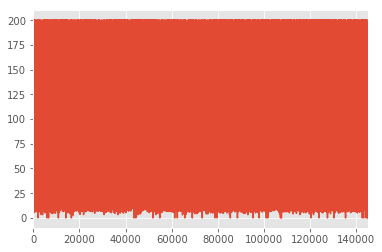

In [8]:
df[VERSION[:-1]+'_val'].plot()

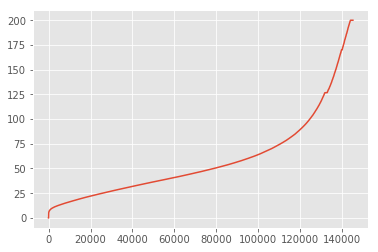

In [9]:
plt.plot((df[VERSION[:-1]+'_val'].sort_values().values))

In [10]:
df.head()

,page_index,v2_full,v2_val
0,60904,41.641449,28.448150
1,90264,85.400459,126.666667
2,136392,32.991662,26.905081
3,81801,11.450168,13.391316
4,4466,11.442976,28.590462


In [11]:
def load_plot(page):
    forecast = pd.read_feather(PROPHET_PATH+VERSION+page+'df.f')
    wiki.newphet.prophet_plot(forecast)
    plt.show()

page_index 81645
v1.6_val 200.0


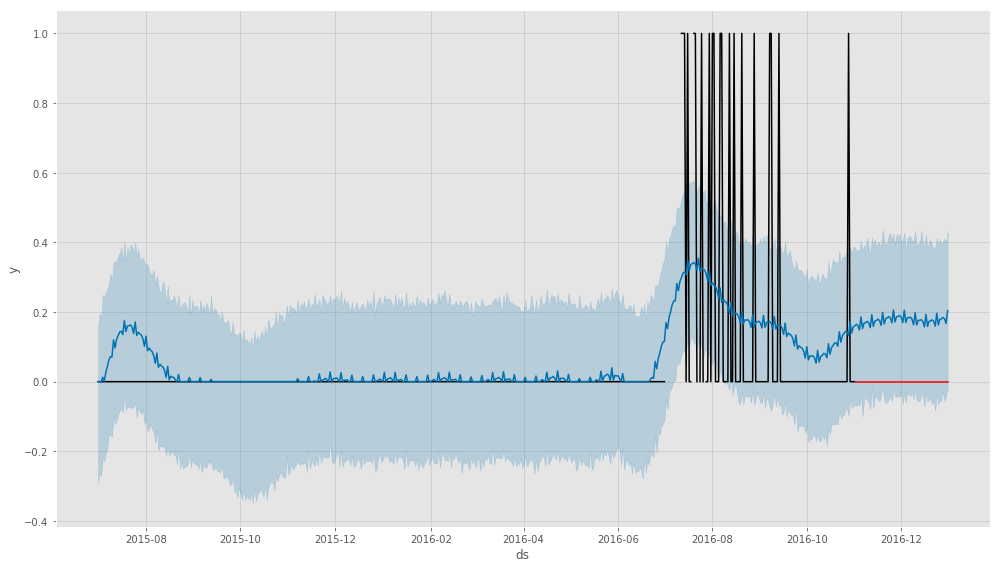

page_index 98128
v1.6_val 200.0


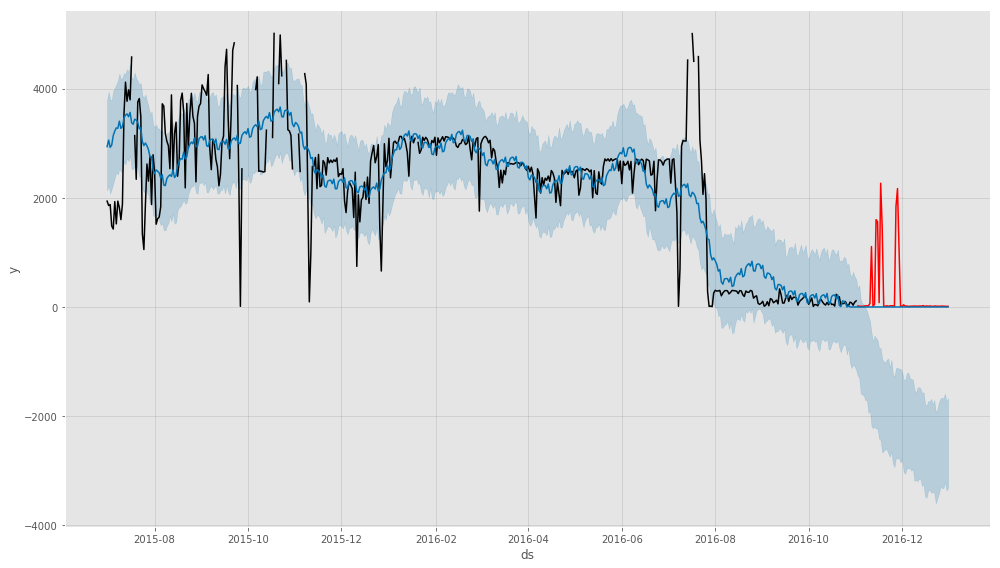

page_index 81969
v1.6_val 200.0


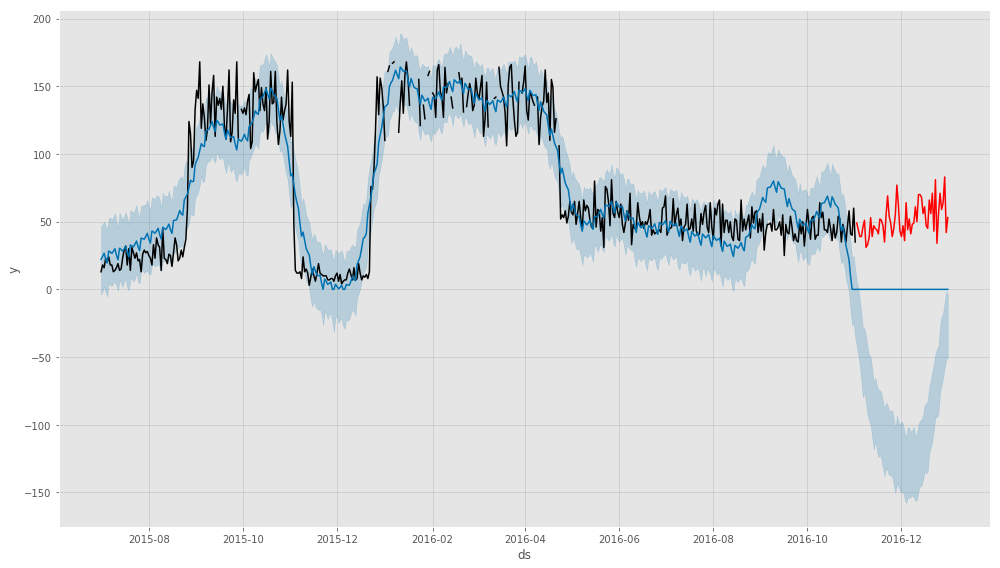

In [12]:
for row in df.sort_values(by=VERSION[:-1]+'_val',ascending=False).iloc[:3].iterrows():
    print('page_index', row[1][0])
    print('v1.6_val', row[1][2])
    load_plot(row[1][0])

page_index 78830
v1.6_val 0.0


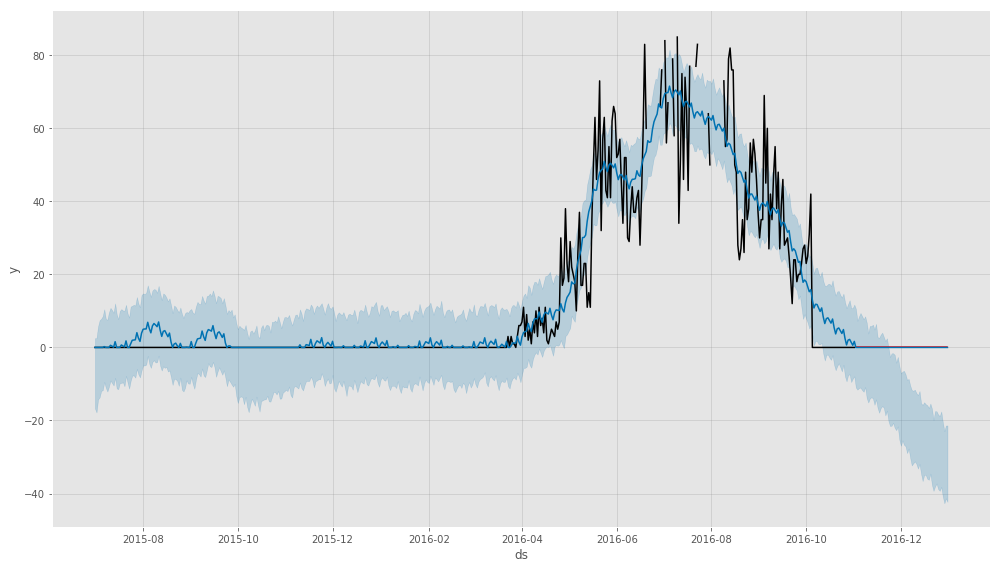

page_index 20394
v1.6_val 0.0


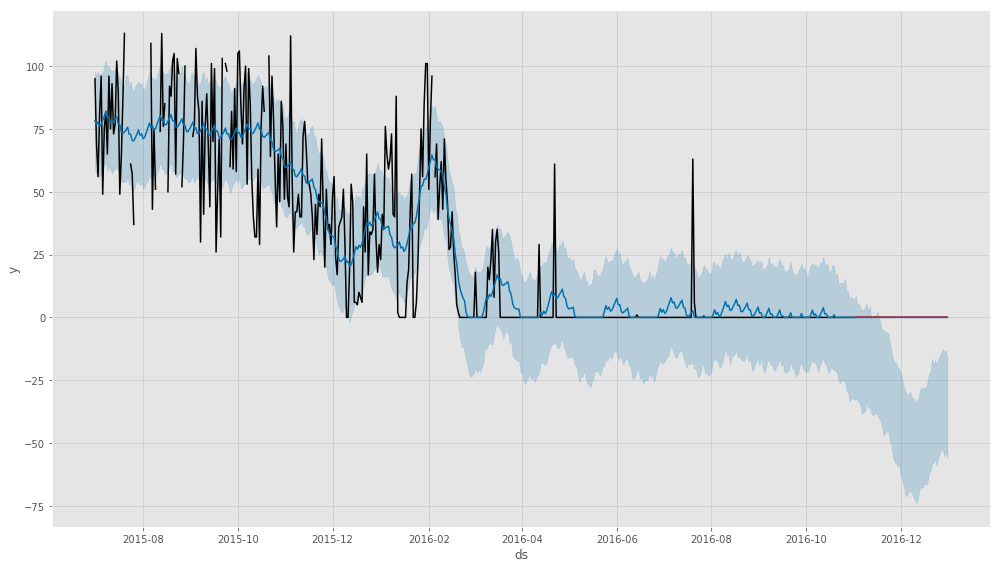

page_index 20386
v1.6_val 0.0


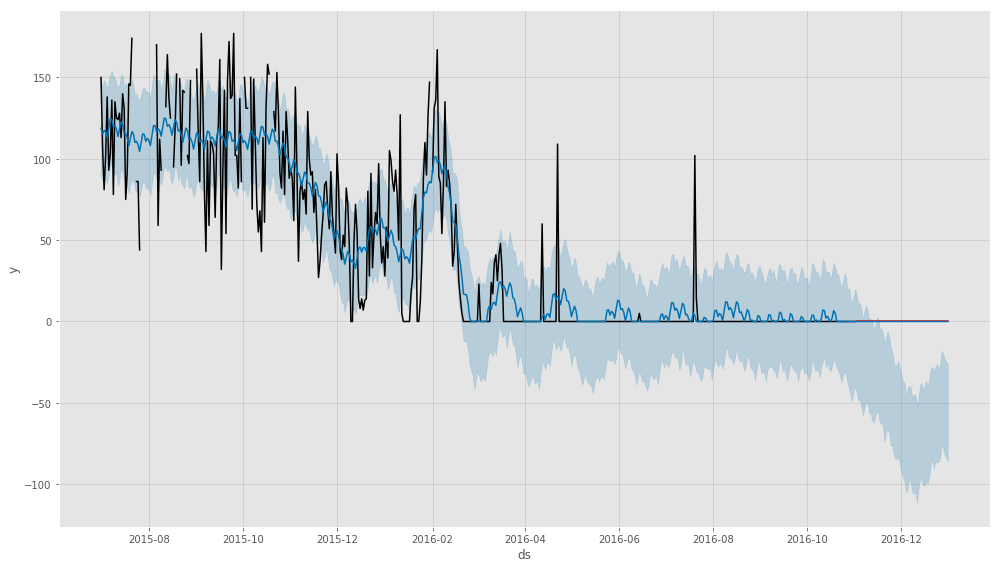

In [13]:
for row in df.sort_values(by=VERSION[:-1]+'_val',ascending=True).iloc[:3].iterrows():
    print('page_index', row[1][0])
    print('v1.6_val', row[1][2])
    load_plot(row[1][0])

In [ ]:
130410

In [ ]:
forecast130410 = pd.read_feather(PROPHET_PATH+VERSION+'130410'+'df.f')

In [ ]:
wiki.newphet.prophet_plot(forecast130410)

In [ ]:
forecast130410.trend.plot()

In [ ]:
forecast130410.trend

In [ ]:
forecast29930 = pd.read_feather(PROPHET_PATH+VERSION+'29930'+'df.f')
with open(PROPHET_PATH+VERSION+'29930'+'m.pk', 'rb') as file:
    m29930 = pk.load(file)

In [ ]:
wiki.newphet.prophet_plot(forecast29930)

In [ ]:
m29930.plot_components(forecast29930);